In [51]:
from keras.datasets import reuters
from keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

# Data Acquisition

In [52]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

C:\Users\Tajr\Anaconda3\envs\Deep_Learning\lib\site-packages\keras\datasets\reuters.py:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Tajr\Anaconda3\envs\Deep_Learning\lib\site-packages\keras\datasets\reuters.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [53]:
len(train_data)

8982

In [54]:
len(test_data)

2246

# Decode

In [55]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [56]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_news_wire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_news_wire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [57]:
train_labels[10]

3

# Data Preparation

In [58]:
def vectorize_data(sequences, dimension=10000):
    result = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1
    
    return result

# Vectorize train and test data
x_train = vectorize_data(train_data)
x_test = vectorize_data(test_data)

# vectorize train and test labels
y_train = vectorize_data(train_labels, 46)
y_test = vectorize_data(test_labels, 46)
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Build a network

In [59]:
# Model definition

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [60]:
# Model compilation
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
len(x_train)

8982

In [62]:
# Creating Validation data
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

# Model Training

In [63]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 161us/step - loss: 2.7909 - accuracy: 0.5080 - val_loss: 1.8939 - val_accuracy: 0.6430
Epoch 2/20
7982/7982 [==============================] - 1s 115us/step - loss: 1.5243 - accuracy: 0.7021 - val_loss: 1.3817 - val_accuracy: 0.7110
Epoch 3/20
7982/7982 [==============================] - 1s 124us/step - loss: 1.1170 - accuracy: 0.7661 - val_loss: 1.1781 - val_accuracy: 0.7510
Epoch 4/20
7982/7982 [==============================] - 1s 130us/step - loss: 0.8799 - accuracy: 0.8161 - val_loss: 1.0811 - val_accuracy: 0.7740
Epoch 5/20
7982/7982 [==============================] - 1s 129us/step - loss: 0.7055 - accuracy: 0.8519 - val_loss: 0.9895 - val_accuracy: 0.8030
Epoch 6/20
7982/7982 [==============================] - 1s 129us/step - loss: 0.5621 - accuracy: 0.8845 - val_loss: 0.9346 - val_accuracy: 0.8070
Epoch 7/20
7982/7982 [==============================] - 1s 124us/step - loss

In [64]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

# Ploting

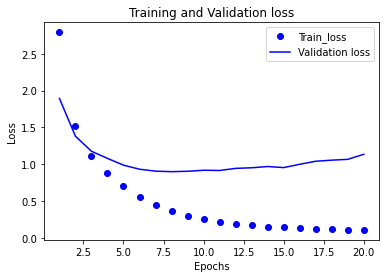

In [67]:
# Loss and validation loss
train_loss = history_dict['loss']
validation_loss = history_dict['val_loss']

epochs = range(1, len(history_dict['loss']) +1)

plt.plot(epochs, train_loss, 'bo', label='Train_loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

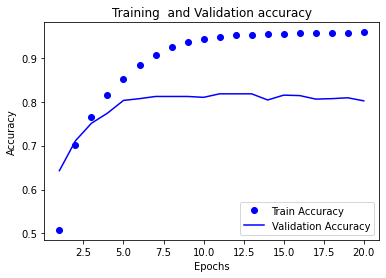

In [66]:
# Training Accuracy and Validation Accuracy
train_accuracy = history_dict['accuracy']
validation_accuracy = history_dict['val_accuracy']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.clf()
plt.plot(epochs, train_accuracy, 'bo', label="Train Accuracy")
plt.plot(epochs, validation_accuracy, 'b', label='Validation Accuracy')
plt.title('Training  and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Retrain a model with 9 epochs to resolve overfitting experienced above

In [68]:
# Model definition
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# compilation
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# training
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 135us/step - loss: 2.6221 - accuracy: 0.5621 - val_loss: 1.7073 - val_accuracy: 0.6590
Epoch 2/9
7982/7982 [==============================] - 1s 118us/step - loss: 1.4088 - accuracy: 0.7098 - val_loss: 1.2866 - val_accuracy: 0.7240
Epoch 3/9
7982/7982 [==============================] - 1s 127us/step - loss: 1.0518 - accuracy: 0.7742 - val_loss: 1.1221 - val_accuracy: 0.7570
Epoch 4/9
7982/7982 [==============================] - 1s 119us/step - loss: 0.8356 - accuracy: 0.8221 - val_loss: 1.0301 - val_accuracy: 0.7730
Epoch 5/9
7982/7982 [==============================] - 1s 117us/step - loss: 0.6697 - accuracy: 0.8582 - val_loss: 0.9793 - val_accuracy: 0.7940
Epoch 6/9
7982/7982 [==============================] - 1s 118us/step - loss: 0.5363 - accuracy: 0.8896 - val_loss: 0.9415 - val_accuracy: 0.8100
Epoch 7/9
7982/7982 [==============================] - 1s 120us/step - loss: 0.433

# Model evaluation

In [69]:
model.evaluate(x_test, y_test)

2246/2246 [==============================] - 0s 203us/step


[0.9806554665654659, 0.7889581322669983]

In [74]:
# From above we can conclude the accuracy of our model is near 79%: below is how to use a model for predictions on a new data
prediction = model.predict(x_test)
prediction[0]

array([2.87737377e-04, 2.50866113e-04, 1.64007179e-05, 9.38894570e-01,
       4.46472466e-02, 1.63043860e-05, 1.13615766e-04, 4.38792522e-05,
       2.86640227e-03, 2.25325421e-05, 5.06973956e-05, 3.96681338e-04,
       9.42300467e-05, 5.83201938e-04, 1.35298062e-04, 8.62240486e-05,
       1.70350948e-03, 1.20275491e-03, 4.08845553e-05, 2.69437069e-03,
       1.89300952e-03, 5.52634650e-04, 1.60766758e-05, 3.66738386e-04,
       1.85193116e-04, 1.53571775e-04, 2.72009311e-05, 4.91813917e-05,
       4.49327999e-05, 7.44419347e-04, 2.36682725e-04, 3.86118074e-04,
       6.14777382e-05, 5.75662561e-05, 1.97125395e-04, 1.47822921e-05,
       3.92787151e-05, 1.54398120e-04, 4.23545789e-05, 2.59537628e-04,
       4.17280826e-05, 2.76776380e-04, 1.46346574e-05, 1.33375534e-05,
       5.30681018e-06, 1.84101773e-05], dtype=float32)

In [76]:
# The sum of predictions is 1
sum = np.sum(prediction[0])
sum

0.9999999

In [79]:
# largerst entry
largest_entry = np.argmax(prediction[0])
largest_entry

3

In [80]:
# Shape of prediction
prediction[0].shape

(46,)